In [1]:
conda install -c conda-forge wordcloud=1.6.0 

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [46]:
import os
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
##import yfinance as yf
import re
import requests
from bs4 import BeautifulSoup
##import reticker
import nltk
## from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [3]:
### read the file

In [4]:
df=pd.read_csv("reddit_wsb.csv")
df.head()

,title,score,id,url,comms_num,created,body,timestamp
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56


In [5]:
### pre-processing

In [6]:
df["body"] = df["body"].fillna("") ## fill nan's with empty
df["original_text"] = df["title"] + ' ' + df["body"] ## concatane body and title to create a new column called original_text
df = df.drop(columns = ["body", "title", "id", "url", "created"]) ## drop unrelated columns
df.head()

,score,comms_num,timestamp,original_text
0,55,6,2021-01-28 21:37:41,"It's not about the money, it's about sending a..."
1,110,23,2021-01-28 21:32:10,Math Professor Scott Steiner says the numbers ...
2,0,47,2021-01-28 21:30:35,Exit the system The CEO of NASDAQ pushed to ha...
3,29,74,2021-01-28 21:28:57,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...
4,71,156,2021-01-28 21:26:56,"Not to distract from GME, just thought our AMC..."


In [7]:
### text cleaning 

In [8]:
def clean_text_date(text):
    text = text.lower()
    
    # remove emojis
    text = text.encode('ascii','ignore')
    text = text.decode()

    # replacing handlers with empty string
    text = re.sub('@[^\s]+',"",text)
    
    # remove punctuations and numbers
    text = re.sub('[^a-zA-Z]', ' ', text)
    
    # replacing URLs with empty string
    text = re.sub(r"http\S+", "",text)

    # remove all the special characters
    text = ' '.join(re.findall(r'\w+', text))

    # replacing single characters with empty string
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)

    # substituting multiple spaces with single space
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    
    # remove stopwords
    text = ' '.join([word for word in text.split() if not word in set(stopwords.words('english'))])
    
    # words to singular forms
    lem = WordNetLemmatizer()
    text = lem.lemmatize(text)
    
    return text

In [9]:
# Text Preprocessing
df["text"] = df["original_text"].apply(lambda x : clean_text_date(x))

In [10]:
df.head()

,score,comms_num,timestamp,original_text,text
0,55,6,2021-01-28 21:37:41,"It's not about the money, it's about sending a...",money sending message
1,110,23,2021-01-28 21:32:10,Math Professor Scott Steiner says the numbers ...,math professor scott steiner says numbers spel...
2,0,47,2021-01-28 21:30:35,Exit the system The CEO of NASDAQ pushed to ha...,exit system ceo nasdaq pushed halt trading giv...
3,29,74,2021-01-28 21:28:57,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,new sec filing gme someone less retarded pleas...
4,71,156,2021-01-28 21:26:56,"Not to distract from GME, just thought our AMC...",distract gme thought amc brothers aware


In [12]:
### get tickers

In [13]:
text_all = ' '.join(df["original_text"])

In [14]:
tickers = re.findall(r'[$][A-Za-z]{2,4}', text_all)

In [15]:
ticker_list = set([t.lower() for t in tickers])
ticker_list

{'$celh',
 '$blia',
 '$cake',
 '$ssft',
 '$pton',
 '$tnxp',
 '$bark',
 '$aer',
 '$tsx',
 '$otly',
 '$klic',
 '$jblu',
 '$ebay',
 '$sid',
 '$cuk',
 '$and',
 '$cera',
 '$moln',
 '$kai',
 '$hp',
 '$pdd',
 '$adsk',
 '$cray',
 '$inco',
 '$cwh',
 '$kmi',
 '$aap',
 '$qsr',
 '$amgd',
 '$addf',
 '$crwd',
 '$tlt',
 '$jcom',
 '$mcd',
 '$nly',
 '$riot',
 '$byd',
 '$ntra',
 '$iipr',
 '$srpt',
 '$snpe',
 '$tpr',
 '$fan',
 '$ww',
 '$lcid',
 '$schw',
 '$amat',
 '$kin',
 '$cour',
 '$nnox',
 '$idxx',
 '$tsm',
 '$ufpi',
 '$gnog',
 '$walr',
 '$uscr',
 '$hang',
 '$glpi',
 '$hag',
 '$pypl',
 '$cop',
 '$clvs',
 '$mas',
 '$rtk',
 '$uup',
 '$reed',
 '$ftai',
 '$twst',
 '$ttwo',
 '$gs',
 '$tme',
 '$sear',
 '$faam',
 '$coty',
 '$agq',
 '$zto',
 '$nxe',
 '$shen',
 '$vff',
 '$ua',
 '$apd',
 '$fvrr',
 '$nee',
 '$maps',
 '$hyg',
 '$pkx',
 '$futu',
 '$weed',
 '$on',
 '$tscr',
 '$gsat',
 '$cvs',
 '$novc',
 '$lhdx',
 '$blnk',
 '$gush',
 '$usmj',
 '$nat',
 '$deep',
 '$rddt',
 '$alk',
 '$timu',
 '$spwr',
 '$rope',
 '$rtr

In [16]:
# to rank the tickers by count:
# initializing the list
frequency = {}

# iterating over the list
for item in tickers:
   # checking the element in dictionary
   if item in frequency:
      # incrementing the counr
      frequency[item] += 1
   else:
      # initializing the count
      frequency[item] = 1

# printing the frequency
frequency

{'$GME': 2790,
 '$AG': 128,
 '$SLV': 141,
 '$NOK': 425,
 '$BB': 632,
 '$AMC': 854,
 '$DDS': 3,
 '$PLTR': 217,
 '$PRPL': 38,
 '$BBBY': 91,
 '$nok': 9,
 '$NIO': 95,
 '$amc': 14,
 '$bb': 8,
 '$gme': 53,
 '$NAKD': 62,
 '$Prop': 1,
 '$AAL': 56,
 '$TELL': 13,
 '$GE': 29,
 '$bbby': 2,
 '$SNDL': 144,
 '$EXPR': 30,
 '$BABA': 85,
 '$XSPA': 3,
 '$MDVL': 2,
 '$HCMC': 3,
 '$AM': 2,
 '$SHMP': 1,
 '$NAK': 8,
 '$SIRI': 6,
 '$Mkd': 1,
 '$BNGO': 15,
 '$TR': 29,
 '$INO': 33,
 '$znga': 1,
 '$sndl': 2,
 '$Gme': 2,
 '$PRTY': 2,
 '$AHT': 4,
 '$CMPS': 35,
 '$MMED': 5,
 '$CYBN': 1,
 '$NMIH': 1,
 '$game': 1,
 '$oopc': 1,
 '$PLAY': 19,
 '$BBW': 28,
 '$DAL': 6,
 '$LMT': 12,
 '$TSLA': 192,
 '$PSLV': 12,
 '$CTRM': 20,
 '$clvs': 1,
 '$SVM': 1,
 '$FIZZ': 11,
 '$GOPR': 1,
 '$SPCE': 114,
 '$amd': 1,
 '$SRNE': 8,
 '$ONTX': 1,
 '$AMCX': 1,
 '$ATOS': 2,
 '$MO': 55,
 '$RIG': 28,
 '$TSNP': 4,
 '$RXMD': 2,
 '$DOGE': 4,
 '$FTT': 1,
 '$Doge': 1,
 '$ZOM': 17,
 '$Sndl': 2,
 '$LNVG': 2,
 '$Bb': 2,
 '$AAPL': 100,
 '$PAAS': 1,
 '$C

In [17]:
s_freq = sorted(frequency.items(), key=lambda item: item[1], reverse = True)

In [19]:
s_freq 

[('$GME', 2790),
 ('$AMC', 854),
 ('$BB', 632),
 ('$NOK', 425),
 ('$RKT', 333),
 ('$UWMC', 247),
 ('$WISH', 245),
 ('$PLTR', 217),
 ('$RIDE', 209),
 ('$TSLA', 192),
 ('$CLOV', 167),
 ('$CLF', 150),
 ('$SNDL', 144),
 ('$SLV', 141),
 ('$AMD', 136),
 ('$AG', 128),
 ('$TLRY', 122),
 ('$SPCE', 114),
 ('$ASO', 112),
 ('$CLNE', 111),
 ('$GOEV', 110),
 ('$AAPL', 100),
 ('$NIO', 95),
 ('$CHPT', 95),
 ('$BLIA', 94),
 ('$BBBY', 91),
 ('$BABA', 85),
 ('$VIAC', 85),
 ('$APHA', 84),
 ('$CRSR', 83),
 ('$MVIS', 80),
 ('$SKT', 71),
 ('$SPY', 68),
 ('$LUMN', 63),
 ('$NAKD', 62),
 ('$ROOT', 62),
 ('$AAL', 56),
 ('$AMZN', 56),
 ('$MO', 55),
 ('$DKNG', 54),
 ('$gme', 53),
 ('$ON', 53),
 ('$ROPE', 50),
 ('$WKHS', 48),
 ('$NVDA', 48),
 ('$FUBO', 47),
 ('$SEAR', 45),
 ('$AMRS', 44),
 ('$SENS', 43),
 ('$SQ', 40),
 ('$SKLZ', 40),
 ('$DGX', 39),
 ('$PRPL', 38),
 ('$DASH', 38),
 ('$ET', 37),
 ('$DISC', 36),
 ('$CMPS', 35),
 ('$PLUG', 35),
 ('$DMTK', 35),
 ('$MX', 35),
 ('$COIN', 35),
 ('$SOFI', 35),
 ('$BA', 34),

In [ ]:
### features

In [20]:
# the lengths of the messages
df['length'] = df['original_text'].apply(len)

In [21]:
df.head()

,score,comms_num,timestamp,original_text,text,length
0,55,6,2021-01-28 21:37:41,"It's not about the money, it's about sending a...",money sending message,60
1,110,23,2021-01-28 21:32:10,Math Professor Scott Steiner says the numbers ...,math professor scott steiner says numbers spel...,81
2,0,47,2021-01-28 21:30:35,Exit the system The CEO of NASDAQ pushed to ha...,exit system ceo nasdaq pushed halt trading giv...,1335
3,29,74,2021-01-28 21:28:57,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,new sec filing gme someone less retarded pleas...,76
4,71,156,2021-01-28 21:26:56,"Not to distract from GME, just thought our AMC...",distract gme thought amc brothers aware,80


In [22]:
### Linking to stocks
### GME, AML, BB, NOK, TSLA

In [24]:
df['GME'] = df.original_text.str.contains(r'\bgme\b |\bGME\b | \bGameStop\b | gamestop') 
df['GME'] = df['GME'].astype(int)

In [25]:
df['AMC'] = df.original_text.str.contains(r'\bamc\b |\bAMC\b') 
df['AMC'] = df['AMC'].astype(int)

In [26]:
df['BB'] = df.original_text.str.contains(r'\bbb\b |\bBB\b | \bBlackBerry\b | \bblackberry\b | \bBlackberry\b') 
df['BB'] = df['BB'].astype(int)

In [27]:
df['NOK'] = df.original_text.str.contains(r'\bnok\b |\bNOK\b | \bNokia\b | \bnokia\b ') 
df['NOK'] = df['NOK'].astype(int)

In [28]:
df['TSLA'] = df.original_text.str.contains(r'\btsla\b |\bTSLA\b | \bTesla\b | \btesla\b ') 
df['TSLA'] = df['TSLA'].astype(int)

In [29]:
df.head(10)

,score,comms_num,timestamp,original_text,text,length,GME,AMC,BB,NOK,TSLA
0,55,6,2021-01-28 21:37:41,"It's not about the money, it's about sending a...",money sending message,60,0,0,0,0,0
1,110,23,2021-01-28 21:32:10,Math Professor Scott Steiner says the numbers ...,math professor scott steiner says numbers spel...,81,0,0,0,0,0
2,0,47,2021-01-28 21:30:35,Exit the system The CEO of NASDAQ pushed to ha...,exit system ceo nasdaq pushed halt trading giv...,1335,1,0,0,0,0
3,29,74,2021-01-28 21:28:57,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,new sec filing gme someone less retarded pleas...,76,0,0,0,0,0
4,71,156,2021-01-28 21:26:56,"Not to distract from GME, just thought our AMC...",distract gme thought amc brothers aware,80,0,1,0,0,0
5,405,84,2021-01-28 21:26:30,WE BREAKING THROUGH,breaking,20,0,0,0,0,0
6,317,53,2021-01-28 21:26:27,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE He...,short stock expiration date hedgefund whales s...,708,0,0,0,0,0
7,405,178,2021-01-28 21:19:31,THIS IS THE MOMENT Life isn't fair. My mother ...,moment life fair mother always told would comp...,1989,0,0,0,0,0
8,200,161,2021-01-28 21:19:16,Currently Holding AMC and NOK - Is it retarded...,currently holding amc nok retarded think move ...,95,1,1,0,1,0
9,291,27,2021-01-28 21:18:37,I have nothing to say but BRUH I am speechless...,nothing say bruh speechless moon,67,0,0,0,0,0


In [30]:
df[(df['GME'] == 1) & (df['AMC'] == 1) & (df['BB'] == 1) & (df['NOK'] == 1) & (df['TSLA'] == 1)]

,score,comms_num,timestamp,original_text,text,length,GME,AMC,BB,NOK,TSLA
11394,1,0,2021-01-29 02:39:09,"THIS IS TEMPORARY Careful guys, they're shakin...",temporary careful guys shaking tons weak hands...,425,1,1,1,1,1
19410,407,64,2021-02-01 13:25:20,An in-depth analysis of what would happen if w...,depth analysis would happen held gme updated n...,2449,1,1,1,1,1
29646,87,15,2021-02-06 06:57:07,"GME, BB, AMC, NOK Your one pager of dipshit du...",gme bb amc nok one pager dipshit dumbassness l...,3775,1,1,1,1,1
31092,97,69,2021-02-08 05:58:25,A sad and hopefully inspiring story to HOLD 😀 ...,sad hopefully inspiring story hold context bou...,1317,1,1,1,1,1
32227,440,153,2021-02-08 18:00:02,AMC Major Stakeholder Wanda Converts Stock To ...,amc major stakeholder wanda converts stock all...,1890,1,1,1,1,1
33019,362,139,2021-02-14 22:44:20,Do you need some variety in your life? Tired o...,need variety life tired gme short squoze handp...,4226,1,1,1,1,1
33486,195,60,2021-02-15 14:20:34,Comparing Market Volume Patterns for Stocks fr...,comparing market volume patterns stocks wsb se...,6635,1,1,1,1,1
37039,2818,440,2021-03-03 00:29:06,MEMEMAGEDDON March 19th - Quadruple Witching $...,mememageddon march th quadruple witching amc b...,6862,1,1,1,1,1
41190,105,16,2021-03-13 04:34:20,A health guide for the storm we find ourselves...,health guide storm find ok guys get comes maki...,5270,1,1,1,1,1
41791,61,90,2021-03-16 20:15:07,A New Age is Upon us. Which side are you on? -...,new age upon us side riot stock analysis b sto...,8278,1,1,1,1,1


In [31]:
len(df[(df['GME'] == 1) & (df['AMC'] == 1) & (df['BB'] == 1) & (df['NOK'] == 1) & (df['TSLA'] == 1)])

10

In [32]:
df[(df['GME'] == 1) | (df['AMC'] == 1) | (df['BB'] == 1) | (df['NOK'] == 1) | (df['TSLA'] == 1)]

,score,comms_num,timestamp,original_text,text,length,GME,AMC,BB,NOK,TSLA
2,0,47,2021-01-28 21:30:35,Exit the system The CEO of NASDAQ pushed to ha...,exit system ceo nasdaq pushed halt trading giv...,1335,1,0,0,0,0
4,71,156,2021-01-28 21:26:56,"Not to distract from GME, just thought our AMC...",distract gme thought amc brothers aware,80,0,1,0,0,0
8,200,161,2021-01-28 21:19:16,Currently Holding AMC and NOK - Is it retarded...,currently holding amc nok retarded think move ...,95,1,1,0,1,0
10,222,70,2021-01-28 21:18:25,"We need to keep this movement going, we all ca...",need keep movement going make history believe ...,786,0,1,0,0,0
11,562,97,2021-01-28 21:17:28,GME Premarket 🍁 Musk approved 🎮🛑💎✋,gme premarket musk approved,35,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
53166,101,45,2021-08-02 22:27:45,Rolling TSLA Gamma Strategy 200x by October A ...,rolling tsla gamma strategy october big trade ...,4203,0,0,0,0,1
53174,2997,530,2021-08-02 19:46:18,GME $950 Calls YOLO (IV Dipped Under 100% agai...,gme calls yolo iv dipped joining p earnings ca...,136,1,0,0,0,0
53175,28,36,2021-08-02 19:14:17,"Downtrends ... How to deal with them. WSB, hi....",downtrends deal wsb hi may know previous shitt...,1838,0,1,0,0,0
53181,156,204,2021-08-02 17:11:36,Ten Year Price Prediction for TSLA It’s all co...,ten year price prediction tsla contingent mast...,693,0,0,0,0,1


In [33]:
len(df[(df['GME'] == 1) | (df['AMC'] == 1) | (df['BB'] == 1) | (df['NOK'] == 1) | (df['TSLA'] == 1)])

16491

In [34]:
### EDA

(-0.5, 399.5, 199.5, -0.5)

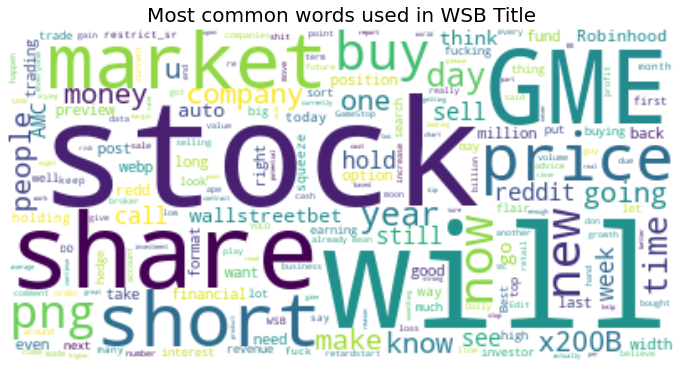

In [35]:
# Creating Word Cloud
# Words to not include in Word Clouds
my_stopwords = set(STOPWORDS)
# Additional phrases I don't want picked up in word clouds
my_stopwords.update(['https', 'http', '\n', '\t'])
title_wc = WordCloud(stopwords = my_stopwords,background_color='white', collocations = False).generate(text_all)
plt.figure(figsize=(12,10))
plt.imshow(title_wc, interpolation='bilinear')
plt.title('Most common words used in WSB Title', fontsize = 20)
plt.axis('off')

In [36]:
### how many words from the beginning it appears

In [37]:
tokens = nltk.word_tokenize(text_all)   # tokenize it

In [38]:
mytext = nltk.Text(tokens)         # turn text into a NLTK Text object

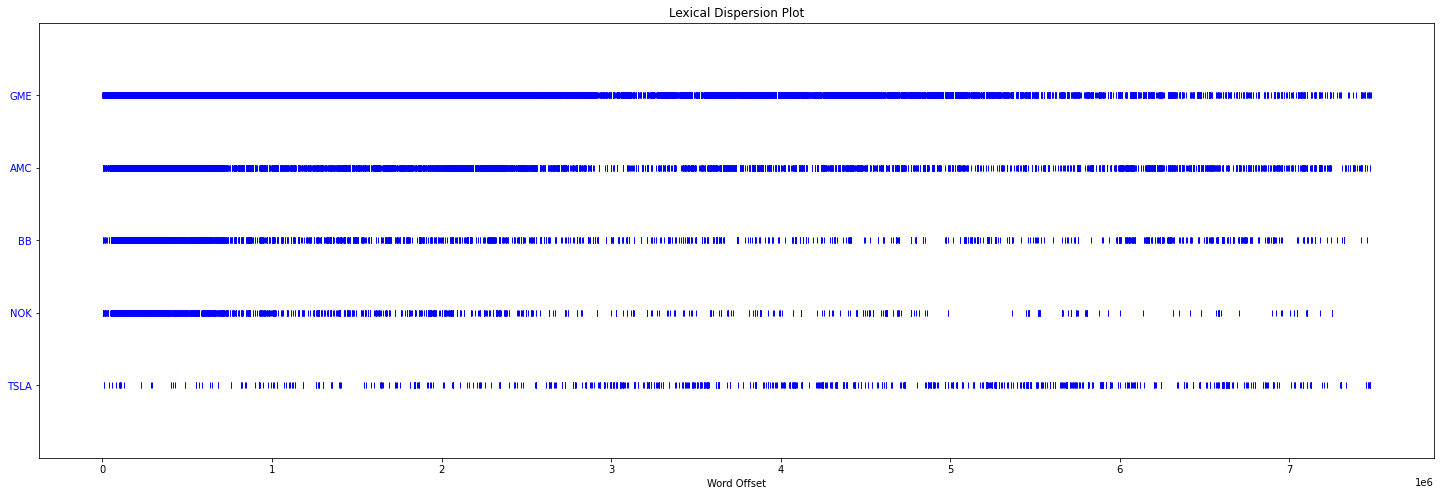

In [39]:
plt.figure(figsize=(25, 8))  # change figsize to (width, height), the size you want
mytext.dispersion_plot(["GME", "AMC", "BB", "NOK", "TSLA"])

In [41]:
#convert date column to datetime 
df['timestamp'] = pd.to_datetime(df['timestamp'], 
                                    format='%Y-%m-%dT%H:%M:%S.%f')
df.dtypes

score                     int64
comms_num                 int64
timestamp        datetime64[ns]
original_text            object
text                     object
length                    int64
GME                       int64
AMC                       int64
BB                        int64
NOK                       int64
TSLA                      int64
dtype: object

In [42]:
##creating year, mont, dayofweek, hour, min, second columns for eda
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.dayofweek
df['hour'] = df['timestamp'].dt.hour
df['min'] = df['timestamp'].dt.minute
df['sec'] = df['timestamp'].dt.second

##we can get name of the days if we need to.
##dayoftheweek = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
##days = list(dayoftheweek.values())
##df['day'] = df['timestamp'].apply(lambda x : dayoftheweek[x.weekday()])

In [45]:
sum (df['text'].str.contains('bullish'))

1056

In [47]:
sia = SentimentIntensityAnalyzer()

In [48]:
a = 'bull'
sia.polarity_scores(a)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [49]:
df["neg"] = df["text"].apply(lambda x: sia.polarity_scores(x)["neg"])
df["neu"] = df["text"].apply(lambda x: sia.polarity_scores(x)["neu"])
df["pos"] = df["text"].apply(lambda x: sia.polarity_scores(x)["pos"])
df["compound"] = df["text"].apply(lambda x: sia.polarity_scores(x)["compound"])

In [50]:
scores = {"neg":0, "neu":0, "11-100":0, "pos":0}

for i in df["compound"]:
    if i < -0.2:
        scores["neg"] += 1
    elif i < 0.2:
        scores["neu"] += 1
    else:
        scores["pos"] += 1

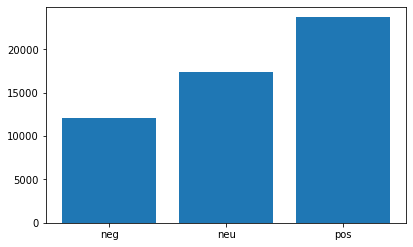

In [51]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5, 3))
ax = fig.add_axes([0,0,1,1])
score_label = ["neg", "neu", "pos"]
value = [scores["neg"], scores["neu"], scores["pos"]]
ax.bar(score_label, value)
plt.show()

In [52]:
new_words = {
'citron': -4.0,  
'hidenburg': -4.0,
'green': 2.0,
'hot': 2.0,
'squeeze': 2.0,
'ape': 2.0,
'apes': 2.0,
'apes together strong': 3.0,
'roaring kitty': 2.0,
'bull': 4.0,
'bullish': 4.0,
'bear': -4.0,
'bearish': 4.0,
'bag holder': -3.0,
'bagholder': -3.0,
'bag holding': -3.0,
'bagholding': -3.0,
'hold': 2.0,
'hold the line': 3.0,
'diamond': 3.0,
'diamond hands': 3.0,
'paper hands': -3.0,
'weak hands': -3.0,
'DD': 2.0,
'double Down': 2.0,
'due diligence': 2.0,
'pump': -2.0,
'pumping': -2.0,
'dump': -2.0,
'pump and dump': -3.0,
'stonk': 2.0,
'stonks': 2.0,
'tendie' : 2.0,
'tendies': 3.0,
'YOLO': 2.0,
'moon': 3.0,
'mooning': 3.0,
'to the moon': 4.0,
'long': 2.0,
'short': -2.0,
'call': 4.0,
'calls': 4.0,
'put': -4.0,
'puts': -4.0,
'overvalued': -3.0,
'undervalued': 3.0,
'low': -2.0,
'high': 2.0,
'buy': 4.0,
'sell': -4.0,
'buy high sell low': -4.0,
'buy the dip': 3.0,
'drop': -3.0,
'rebound': 3.0,
'green': 2.0,
'rip': -3.0,
'offering': 2.0,
'rocket': 3.0,
'break': 2.0,
'we like the stock': 4.0,
'ATH': 4.0,
'IRS': -2.0,
'SEC': -3.0,
'RH': -2.0,
'robinhood': -2.0,
'IPO': 2.0,
'degenerates': -3.0,
'Stimmy': 1.5,
'checks' : 1.0,
'stimmy checks': 2.0,
'loss': -3.0,
'loss porn': -4.0,
'gain': 3.0,
'gain porn': 3.0,
'whale' : -1.0,
'HODL' : 3.0,
'autist': 2.0,
'gamestonk': 2.0,
'crayons': 2.0,
'I eat crayons': 2.0,
'boyfriend': 1.0,
'FOMO': -2.0,
'hedge': -2.0,
'hedgies': -2.0,
'hedge funds': -3.0,
'retard': 2.0,
'retards': 3.0
}

In [53]:
sia.lexicon.update(new_words)

In [54]:
a = 'i like citron'
sia.polarity_scores(a)

{'neg': 0.667, 'neu': 0.0, 'pos': 0.333, 'compound': -0.5423}

In [55]:
df["neg_"] = df["text"].apply(lambda x: sia.polarity_scores(x)["neg"])
df["neu_"] = df["text"].apply(lambda x: sia.polarity_scores(x)["neu"])
df["pos_"] = df["text"].apply(lambda x: sia.polarity_scores(x)["pos"])
df["compound_"] = df["text"].apply(lambda x: sia.polarity_scores(x)["compound"])

In [56]:
scores = {"neg_":0, "neu_":0, "pos_":0}

for i in df["compound_"]:
    if i < -0.2:
        scores["neg_"] += 1
    elif i < 0.2:
        scores["neu_"] += 1
    else:
        scores["pos_"] += 1

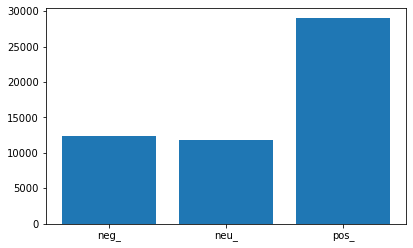

In [57]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5, 3))
ax = fig.add_axes([0,0,1,1])
score_label = ["neg_", "neu_", "pos_"]
value = [scores["neg_"], scores["neu_"], scores["pos_"]]
ax.bar(score_label, value)
plt.show()

In [58]:
df.head()

,score,comms_num,timestamp,original_text,text,length,GME,AMC,BB,NOK,...,min,sec,neg,neu,pos,compound,neg_,neu_,pos_,compound_
0,55,6,2021-01-28 21:37:41,"It's not about the money, it's about sending a...",money sending message,60,0,0,0,0,...,37,41,0.000,1.000,0.000,0.0000,0.000,1.000,0.000,0.0000
1,110,23,2021-01-28 21:32:10,Math Professor Scott Steiner says the numbers ...,math professor scott steiner says numbers spel...,81,0,0,0,0,...,32,10,0.313,0.687,0.000,-0.6249,0.313,0.687,0.000,-0.6249
2,0,47,2021-01-28 21:30:35,Exit the system The CEO of NASDAQ pushed to ha...,exit system ceo nasdaq pushed halt trading giv...,1335,1,0,0,0,...,30,35,0.072,0.801,0.127,0.8260,0.069,0.755,0.176,0.9491
3,29,74,2021-01-28 21:28:57,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,new sec filing gme someone less retarded pleas...,76,0,0,0,0,...,28,57,0.274,0.563,0.163,-0.3368,0.274,0.563,0.163,-0.3368
4,71,156,2021-01-28 21:26:56,"Not to distract from GME, just thought our AMC...",distract gme thought amc brothers aware,80,0,1,0,0,...,26,56,0.306,0.694,0.000,-0.2960,0.306,0.694,0.000,-0.2960


In [59]:
df.to_csv('base_data.csv')

In [63]:
import yfinance as yf

In [172]:
from datetime import timedelta

In [249]:
def getStockPriceChange():
    for ticker in ['GME','AMC','BB','NOK','TSLA']:
        data=yf.download(ticker,start='2020-09-28',end='2021-08-20')
        data['percentage_change_prev_1day']=(data['Close']-data['Open'])/data['Open']
        df1[ticker+'_change_1day_prev']=df1.apply(lambda x:stockPriceChange(x),axis=1)

In [250]:
def stockPriceChange(row):
    td=timedelta(days=1)
    e=row['timestamp']
    prev_day=e-td
    prev_day=prev_day.date()
    prev_day=prev_day.strftime("%Y-%m-%d")
    if prev_day not in data.index:
        return None
    return data['percentage_change_prev_1day'][prev_day]

In [251]:
df1=df

In [252]:
df1=df1.sort_values(by='timestamp')

In [253]:
df1

,score,comms_num,timestamp,original_text,text,length,GME,AMC,BB,NOK,...,min,sec,neg,neu,pos,compound,neg_,neu_,pos_,compound_
32591,4,11,2020-09-29 03:46:56,$CBAT $SUNW $SPI $OXBR Y'all are missing the p...,cbat sunw spi oxbr missing point cbat going gr...,690,0,0,0,0,...,46,56,0.055,0.715,0.230,0.9169,0.053,0.657,0.290,0.9578
257,50,8,2021-01-28 09:08:16,An autists journey. $150 to $68k in one month....,autists journey one month storytime,64,0,0,0,0,...,8,16,0.000,1.000,0.000,0.0000,0.000,1.000,0.000,0.0000
256,70,7,2021-01-28 09:08:17,You all have made Melvin live up to its name,made melvin live name,45,0,0,0,0,...,8,17,0.000,1.000,0.000,0.0000,0.000,1.000,0.000,0.0000
255,75,14,2021-01-28 09:08:18,I got in late on GME but I believe in the caus...,got late gme believe cause willing lose guys a...,355,1,1,0,0,...,8,18,0.128,0.662,0.210,0.5423,0.114,0.550,0.336,0.8885
254,26,22,2021-01-28 09:08:19,Highest SI % of Float End of Business Jan 27th...,highest si float end business jan th according...,330,1,0,0,0,...,8,19,0.000,0.897,0.103,0.4588,0.000,0.897,0.103,0.4588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52340,58,29,2021-08-16 07:17:22,RKT and the week ahead RKTs beginning to show ...,rkt week ahead rkts beginning show signs life ...,4524,0,0,0,0,...,17,22,0.113,0.680,0.207,0.9918,0.127,0.643,0.231,0.9940
52339,13,17,2021-08-16 07:51:18,Verizon ($VZ) – Boomer’s Dividends Are Degener...,verizon vz boomers dividends degenerates tendi...,3306,0,0,0,0,...,51,18,0.033,0.791,0.176,0.9932,0.043,0.722,0.235,0.9969
52338,13,24,2021-08-16 07:52:22,$HIPO - HIPPO HOLDINGS $HIPO - HIPPO HOLDINGS...,hipo hippo holdings hipo hippo holdings degene...,1887,0,0,0,0,...,52,22,0.011,0.849,0.140,0.9649,0.123,0.696,0.181,0.7600
52337,305,21,2021-08-16 08:33:22,Watching your porfolio after a YOLO,watching porfolio yolo,36,0,0,0,0,...,33,22,0.000,0.488,0.512,0.2732,0.000,0.488,0.512,0.2732


In [254]:
getStockPriceChange()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [255]:
df1

,score,comms_num,timestamp,original_text,text,length,GME,AMC,BB,NOK,...,compound,neg_,neu_,pos_,compound_,GME_change_1day_prev,AMC_change_1day_prev,BB_change_1day_prev,NOK_change_1day_prev,TSLA_change_1day_prev
32591,4,11,2020-09-29 03:46:56,$CBAT $SUNW $SPI $OXBR Y'all are missing the p...,cbat sunw spi oxbr missing point cbat going gr...,690,0,0,0,0,...,0.9169,0.053,0.657,0.290,0.9578,-0.00689,-0.00689,-0.00689,-0.00689,-0.00689
257,50,8,2021-01-28 09:08:16,An autists journey. $150 to $68k in one month....,autists journey one month storytime,64,0,0,0,0,...,0.0000,0.000,1.000,0.000,0.0000,-0.02063,-0.02063,-0.02063,-0.02063,-0.02063
256,70,7,2021-01-28 09:08:17,You all have made Melvin live up to its name,made melvin live name,45,0,0,0,0,...,0.0000,0.000,1.000,0.000,0.0000,-0.02063,-0.02063,-0.02063,-0.02063,-0.02063
255,75,14,2021-01-28 09:08:18,I got in late on GME but I believe in the caus...,got late gme believe cause willing lose guys a...,355,1,1,0,0,...,0.5423,0.114,0.550,0.336,0.8885,-0.02063,-0.02063,-0.02063,-0.02063,-0.02063
254,26,22,2021-01-28 09:08:19,Highest SI % of Float End of Business Jan 27th...,highest si float end business jan th according...,330,1,0,0,0,...,0.4588,0.000,0.897,0.103,0.4588,-0.02063,-0.02063,-0.02063,-0.02063,-0.02063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52340,58,29,2021-08-16 07:17:22,RKT and the week ahead RKTs beginning to show ...,rkt week ahead rkts beginning show signs life ...,4524,0,0,0,0,...,0.9918,0.127,0.643,0.231,0.9940,NaN,NaN,NaN,NaN,NaN
52339,13,17,2021-08-16 07:51:18,Verizon ($VZ) – Boomer’s Dividends Are Degener...,verizon vz boomers dividends degenerates tendi...,3306,0,0,0,0,...,0.9932,0.043,0.722,0.235,0.9969,NaN,NaN,NaN,NaN,NaN
52338,13,24,2021-08-16 07:52:22,$HIPO - HIPPO HOLDINGS $HIPO - HIPPO HOLDINGS...,hipo hippo holdings hipo hippo holdings degene...,1887,0,0,0,0,...,0.9649,0.123,0.696,0.181,0.7600,NaN,NaN,NaN,NaN,NaN
52337,305,21,2021-08-16 08:33:22,Watching your porfolio after a YOLO,watching porfolio yolo,36,0,0,0,0,...,0.2732,0.000,0.488,0.512,0.2732,NaN,NaN,NaN,NaN,NaN


In [256]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53187 entries, 32591 to 52336
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   score                  53187 non-null  int64         
 1   comms_num              53187 non-null  int64         
 2   timestamp              53187 non-null  datetime64[ns]
 3   original_text          53187 non-null  object        
 4   text                   53187 non-null  object        
 5   length                 53187 non-null  int64         
 6   GME                    53187 non-null  int64         
 7   AMC                    53187 non-null  int64         
 8   BB                     53187 non-null  int64         
 9   NOK                    53187 non-null  int64         
 10  TSLA                   53187 non-null  int64         
 11  year                   53187 non-null  int64         
 12  month                  53187 non-null  int64         
 1

In [ ]:
def getStockPriceChange(interval='1d'): #valid intervals:1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
    for ticker in ['GME','AMC','BB','NOK','TSLA']:
        data=yf.download(ticker,start='2020-09-28',end='2021-08-20',interval=interval)
        data['percentage_change_prev_1day']=(data['Close']-data['Open'])/data['Open']
        df1[ticker+'_change_1day_prev']=df1.apply(lambda x:stockPriceChange(x),axis=1)

In [264]:
data=yf.download('GME',start='2021-08-10',end='2021-08-20',interval='1h')

[*********************100%***********************]  1 of 1 completed


In [265]:
data

,Open,High,Low,Close,Adj Close,Volume
2021-08-10 09:30:00-04:00,161.360001,166.899902,161.270004,163.199997,163.199997,591399
2021-08-10 10:30:00-04:00,163.059998,163.059998,158.250107,159.419998,159.419998,310719
2021-08-10 11:30:00-04:00,159.399994,159.440002,157.800003,158.600006,158.600006,135713
2021-08-10 12:30:00-04:00,158.806595,159.719803,158.600006,158.600006,158.600006,80925
2021-08-10 13:30:00-04:00,158.600006,158.759995,155.352005,156.101303,156.101303,156444
2021-08-10 14:30:00-04:00,155.900101,158.800003,155.770004,158.800003,158.800003,164856
2021-08-10 15:30:00-04:00,158.892197,159.850006,158.695801,159.050003,159.050003,151142
2021-08-11 09:30:00-04:00,158.429993,159.050003,156.138000,157.304993,157.304993,242043
2021-08-11 10:30:00-04:00,157.339996,157.699997,154.619995,155.016998,155.016998,198845
2021-08-11 11:30:00-04:00,155.000000,156.889999,155.000000,155.925903,155.925903,127228


In [297]:
data['Open']['2021-08-12 09:30:00']

159.6219940185547

In [299]:
from datetime import datetime

In [330]:
time=datetime.strptime('2020-09-29 03:46:56','%Y-%m-%d %H:%M:%S')

In [331]:
#!/usr/bin/env python3
from datetime import datetime, timedelta

def ceil_dt(dt, delta):
    return dt + (datetime.min - dt) % delta

#now = datetime.now()
print(time)    
nearest=ceil_dt(time, timedelta(minutes=30))

2020-09-29 03:46:56


In [332]:
print(nearest)

2020-09-29 04:00:00


In [358]:
type(nearest.minute)

int

In [452]:
def stockPriceChange(row,interval,data):
    def ceil_dt(dt, delta):
        return dt + (datetime.min - dt) % delta
    time=row['timestamp']
    time=datetime.strftime(time,'%Y-%m-%d %H:%M:%S')
    time=datetime.strptime(time,'%Y-%m-%d %H:%M:%S')
    cur_nearest=ceil_dt(time, timedelta(minutes=30))
    if cur_nearest.minute==30:
        prev_hour=cur_nearest-timedelta(hours=1)
    elif cur_nearest.minute==0:
        prev_hour=cur_nearest-timedelta(minutes=90)
    y=time.year
    m=time.month
    d=time.day
    sameday_earliest=datetime(y,m,d,9,30,0)
    sameday_latest=datetime(y,m,d,15,30,0)
    if prev_hour>sameday_latest:
        prev_hour=datetime(y,m,d,15,30,0)
    elif prev_hour<sameday_earliest:
        prev_hour=datetime(y,m,d,15,30,0)-timedelta(days=1)
    while prev_hour not in data.index:
        prev_hour=prev_hour-timedelta(days=1)
    return data['percentage_change_prev_{}'.format(interval)][prev_hour]

In [453]:
def getStockPriceChange(interval):
    for ticker in ['GME','AMC','BB','NOK','TSLA']:
        data=yf.download(ticker,start='2020-09-28',end='2021-08-20',interval=interval)
        data['percentage_change_prev_{}'.format(interval)]=(data['Close']-data['Open'])/data['Open']
        df2[ticker+'_change_{}_prev'.format(interval)]=df2.apply(lambda x:stockPriceChange(x,interval,data),axis=1)

In [454]:
getStockPriceChange('1h')

[*********************100%***********************]  1 of 1 completed


<ipython-input-453-34391b1cbe4c>:5: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  df2[ticker+'_change_{}_prev'.format(interval)]=df2.apply(lambda x:stockPriceChange(x,interval,data),axis=1)
<ipython-input-452-894148bffee9>:23: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  return data['percentage_change_prev_{}'.format(interval)][prev_hour]


[*********************100%***********************]  1 of 1 completed


<ipython-input-453-34391b1cbe4c>:5: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  df2[ticker+'_change_{}_prev'.format(interval)]=df2.apply(lambda x:stockPriceChange(x,interval,data),axis=1)
<ipython-input-452-894148bffee9>:23: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  return data['percentage_change_prev_{}'.format(interval)][prev_hour]


[*********************100%***********************]  1 of 1 completed


<ipython-input-453-34391b1cbe4c>:5: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  df2[ticker+'_change_{}_prev'.format(interval)]=df2.apply(lambda x:stockPriceChange(x,interval,data),axis=1)
<ipython-input-452-894148bffee9>:23: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  return data['percentage_change_prev_{}'.format(interval)][prev_hour]


[*********************100%***********************]  1 of 1 completed


<ipython-input-453-34391b1cbe4c>:5: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  df2[ticker+'_change_{}_prev'.format(interval)]=df2.apply(lambda x:stockPriceChange(x,interval,data),axis=1)
<ipython-input-452-894148bffee9>:23: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  return data['percentage_change_prev_{}'.format(interval)][prev_hour]


[*********************100%***********************]  1 of 1 completed


<ipython-input-453-34391b1cbe4c>:5: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  df2[ticker+'_change_{}_prev'.format(interval)]=df2.apply(lambda x:stockPriceChange(x,interval,data),axis=1)
<ipython-input-452-894148bffee9>:23: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  return data['percentage_change_prev_{}'.format(interval)][prev_hour]


In [ ]:
df2=df1

In [456]:
df2.head()

,score,comms_num,timestamp,original_text,text,length,GME,AMC,BB,NOK,...,GME_change_1day_prev,AMC_change_1day_prev,BB_change_1day_prev,NOK_change_1day_prev,TSLA_change_1day_prev,GME_change_1h_prev,AMC_change_1h_prev,BB_change_1h_prev,NOK_change_1h_prev,TSLA_change_1h_prev
32591,4,11,2020-09-29 03:46:56,$CBAT $SUNW $SPI $OXBR Y'all are missing the p...,cbat sunw spi oxbr missing point cbat going gr...,690,0,0,0,0,...,-0.00689,-0.00689,-0.00689,-0.00689,-0.00689,0.001986,0.014475,-0.004315,-0.002558,-0.001043
257,50,8,2021-01-28 09:08:16,An autists journey. $150 to $68k in one month....,autists journey one month storytime,64,0,0,0,0,...,-0.02063,-0.02063,-0.02063,-0.02063,-0.02063,0.033694,0.061132,-0.006559,-0.033260,0.000155
256,70,7,2021-01-28 09:08:17,You all have made Melvin live up to its name,made melvin live name,45,0,0,0,0,...,-0.02063,-0.02063,-0.02063,-0.02063,-0.02063,0.033694,0.061132,-0.006559,-0.033260,0.000155
255,75,14,2021-01-28 09:08:18,I got in late on GME but I believe in the caus...,got late gme believe cause willing lose guys a...,355,1,1,0,0,...,-0.02063,-0.02063,-0.02063,-0.02063,-0.02063,0.033694,0.061132,-0.006559,-0.033260,0.000155
254,26,22,2021-01-28 09:08:19,Highest SI % of Float End of Business Jan 27th...,highest si float end business jan th according...,330,1,0,0,0,...,-0.02063,-0.02063,-0.02063,-0.02063,-0.02063,0.033694,0.061132,-0.006559,-0.033260,0.000155


In [467]:
df2.describe()

,score,comms_num,length,GME,AMC,BB,NOK,TSLA,year,month,...,GME_change_1day_prev,AMC_change_1day_prev,BB_change_1day_prev,NOK_change_1day_prev,TSLA_change_1day_prev,GME_change_1h_prev,AMC_change_1h_prev,BB_change_1h_prev,NOK_change_1h_prev,TSLA_change_1h_prev
count,53187.000000,53187.000000,53187.000000,53187.000000,53187.000000,53187.000000,53187.000000,53187.000000,53187.000000,53187.000000,...,53187.000000,53187.000000,53187.000000,53187.000000,53187.000000,53187.000000,53187.000000,53187.000000,53187.000000,53187.000000
mean,1382.461053,263.260252,696.724707,0.218493,0.097524,0.029913,0.023483,0.016357,2020.999981,2.408013,...,-0.119045,-0.119045,-0.119045,-0.119045,-0.119045,-0.036456,-0.028723,-0.007713,-0.008752,-0.000180
std,7999.271074,2532.665113,1861.670851,0.413228,0.296673,0.170350,0.151434,0.126847,0.004336,1.705274,...,0.209382,0.209382,0.209382,0.209382,0.209382,0.090605,0.052734,0.019758,0.013235,0.007350
min,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2020.000000,1.000000,...,-0.413313,-0.413313,-0.413313,-0.413313,-0.413313,-0.668225,-0.285888,-0.208058,-0.068533,-0.073467
25%,2.000000,3.000000,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021.000000,1.000000,...,-0.269434,-0.269434,-0.269434,-0.269434,-0.269434,-0.122567,-0.089654,-0.024000,-0.025389,-0.001554
50%,37.000000,17.000000,102.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021.000000,2.000000,...,-0.144084,-0.144084,-0.144084,-0.144084,-0.144084,-0.025862,-0.017588,-0.005268,-0.003764,-0.000156
75%,207.000000,60.000000,495.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.013766,0.006897,0.003797,0.001855,0.003070
max,348241.000000,93268.000000,39749.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2021.000000,9.000000,...,1.051678,1.051678,1.051678,1.051678,1.051678,0.976627,0.446667,0.186956,0.058761,0.064935


In [471]:
df3=df2

In [474]:
def getStockVolume(interval):
    for ticker in ['GME','AMC','BB','NOK','TSLA']:
        data=yf.download(ticker,start='2020-09-28',end='2021-08-20',interval=interval)
        df3[ticker+'_prev_{}_volume'.format(interval)]=df3.apply(lambda x:stockVolume(x,interval,data),axis=1)

In [475]:
def stockVolume(row,interval,data):
    def ceil_dt(dt, delta):
        return dt + (datetime.min - dt) % delta
    time=row['timestamp']
    time=datetime.strftime(time,'%Y-%m-%d %H:%M:%S')
    time=datetime.strptime(time,'%Y-%m-%d %H:%M:%S')
    cur_nearest=ceil_dt(time, timedelta(minutes=30))
    if cur_nearest.minute==30:
        prev_hour=cur_nearest-timedelta(hours=1)
    elif cur_nearest.minute==0:
        prev_hour=cur_nearest-timedelta(minutes=90)
    y=time.year
    m=time.month
    d=time.day
    sameday_earliest=datetime(y,m,d,9,30,0)
    sameday_latest=datetime(y,m,d,15,30,0)
    if prev_hour>sameday_latest:
        prev_hour=datetime(y,m,d,15,30,0)
    elif prev_hour<sameday_earliest:
        prev_hour=datetime(y,m,d,15,30,0)-timedelta(days=1)
    while prev_hour not in data.index:
        prev_hour=prev_hour-timedelta(days=1)
    return data['Volume'][prev_hour]

In [476]:
getStockVolume('1h')

[*********************100%***********************]  1 of 1 completed


<ipython-input-474-a7d5660762a1>:4: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  df3[ticker+'_prev_{}_volume'.format(interval)]=df3.apply(lambda x:stockVolume(x,interval,data),axis=1)
<ipython-input-475-e0c48ebef315>:23: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  return data['Volume'][prev_hour]


[*********************100%***********************]  1 of 1 completed


<ipython-input-474-a7d5660762a1>:4: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  df3[ticker+'_prev_{}_volume'.format(interval)]=df3.apply(lambda x:stockVolume(x,interval,data),axis=1)
<ipython-input-475-e0c48ebef315>:23: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  return data['Volume'][prev_hour]


[*********************100%***********************]  1 of 1 completed


<ipython-input-474-a7d5660762a1>:4: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  df3[ticker+'_prev_{}_volume'.format(interval)]=df3.apply(lambda x:stockVolume(x,interval,data),axis=1)
<ipython-input-475-e0c48ebef315>:23: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  return data['Volume'][prev_hour]


[*********************100%***********************]  1 of 1 completed


<ipython-input-474-a7d5660762a1>:4: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  df3[ticker+'_prev_{}_volume'.format(interval)]=df3.apply(lambda x:stockVolume(x,interval,data),axis=1)
<ipython-input-475-e0c48ebef315>:23: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  return data['Volume'][prev_hour]


[*********************100%***********************]  1 of 1 completed


<ipython-input-474-a7d5660762a1>:4: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  df3[ticker+'_prev_{}_volume'.format(interval)]=df3.apply(lambda x:stockVolume(x,interval,data),axis=1)
<ipython-input-475-e0c48ebef315>:23: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  return data['Volume'][prev_hour]


In [477]:
df3

,score,comms_num,timestamp,original_text,text,length,GME,AMC,BB,NOK,...,GME_change_1h_prev,AMC_change_1h_prev,BB_change_1h_prev,NOK_change_1h_prev,TSLA_change_1h_prev,GME_prev_1h_volume,AMC_prev_1h_volume,BB_prev_1h_volume,NOK_prev_1h_volume,TSLA_prev_1h_volume
32591,4,11,2020-09-29 03:46:56,$CBAT $SUNW $SPI $OXBR Y'all are missing the p...,cbat sunw spi oxbr missing point cbat going gr...,690,0,0,0,0,...,0.001986,0.014475,-0.004315,-0.002558,-0.001043,765977,690900,1257552,3788640,3721664
257,50,8,2021-01-28 09:08:16,An autists journey. $150 to $68k in one month....,autists journey one month storytime,64,0,0,0,0,...,0.033694,0.061132,-0.006559,-0.033260,0.000155,4685482,58414855,23721816,74031372,2143358
256,70,7,2021-01-28 09:08:17,You all have made Melvin live up to its name,made melvin live name,45,0,0,0,0,...,0.033694,0.061132,-0.006559,-0.033260,0.000155,4685482,58414855,23721816,74031372,2143358
255,75,14,2021-01-28 09:08:18,I got in late on GME but I believe in the caus...,got late gme believe cause willing lose guys a...,355,1,1,0,0,...,0.033694,0.061132,-0.006559,-0.033260,0.000155,4685482,58414855,23721816,74031372,2143358
254,26,22,2021-01-28 09:08:19,Highest SI % of Float End of Business Jan 27th...,highest si float end business jan th according...,330,1,0,0,0,...,0.033694,0.061132,-0.006559,-0.033260,0.000155,4685482,58414855,23721816,74031372,2143358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52340,58,29,2021-08-16 07:17:22,RKT and the week ahead RKTs beginning to show ...,rkt week ahead rkts beginning show signs life ...,4524,0,0,0,0,...,0.012459,-0.003474,-0.001517,-0.001630,0.001746,163750,3312938,868000,2463940,1087736
52339,13,17,2021-08-16 07:51:18,Verizon ($VZ) – Boomer’s Dividends Are Degener...,verizon vz boomers dividends degenerates tendi...,3306,0,0,0,0,...,0.012459,-0.003474,-0.001517,-0.001630,0.001746,163750,3312938,868000,2463940,1087736
52338,13,24,2021-08-16 07:52:22,$HIPO - HIPPO HOLDINGS $HIPO - HIPPO HOLDINGS...,hipo hippo holdings hipo hippo holdings degene...,1887,0,0,0,0,...,0.012459,-0.003474,-0.001517,-0.001630,0.001746,163750,3312938,868000,2463940,1087736
52337,305,21,2021-08-16 08:33:22,Watching your porfolio after a YOLO,watching porfolio yolo,36,0,0,0,0,...,0.012459,-0.003474,-0.001517,-0.001630,0.001746,163750,3312938,868000,2463940,1087736


In [493]:
new_word=open('new_words')
new_word=new_word.read()
new_word=new_word.split('\n')
new_word=[word.lower() for word in new_word]

In [494]:
def featureGenerator(row):
    row.text=str(row.text).lower()
    for word in new_word:
        if word in row.text:
            row['has({})'.format(word)]=1
        else:
            row['has({})'.format(word)]=0

In [495]:
df4=df3

In [496]:
for word in new_word:
    df4['has({})'.format(word)] = df4.apply(lambda x: 1 if word in str(x.text).lower() else 0, axis=1)

In [497]:
df4

,score,comms_num,timestamp,original_text,text,length,GME,AMC,BB,NOK,...,has(gamestonk),has(crayons),has(i eat crayons),has(boyfriend),has(fomo),has(hedge),has(hedgies),has(hedge funds),has(retard),has(retards)
32591,4,11,2020-09-29 03:46:56,$CBAT $SUNW $SPI $OXBR Y'all are missing the p...,cbat sunw spi oxbr missing point cbat going gr...,690,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
257,50,8,2021-01-28 09:08:16,An autists journey. $150 to $68k in one month....,autists journey one month storytime,64,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
256,70,7,2021-01-28 09:08:17,You all have made Melvin live up to its name,made melvin live name,45,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
255,75,14,2021-01-28 09:08:18,I got in late on GME but I believe in the caus...,got late gme believe cause willing lose guys a...,355,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
254,26,22,2021-01-28 09:08:19,Highest SI % of Float End of Business Jan 27th...,highest si float end business jan th according...,330,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52340,58,29,2021-08-16 07:17:22,RKT and the week ahead RKTs beginning to show ...,rkt week ahead rkts beginning show signs life ...,4524,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
52339,13,17,2021-08-16 07:51:18,Verizon ($VZ) – Boomer’s Dividends Are Degener...,verizon vz boomers dividends degenerates tendi...,3306,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
52338,13,24,2021-08-16 07:52:22,$HIPO - HIPPO HOLDINGS $HIPO - HIPPO HOLDINGS...,hipo hippo holdings hipo hippo holdings degene...,1887,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52337,305,21,2021-08-16 08:33:22,Watching your porfolio after a YOLO,watching porfolio yolo,36,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [526]:
df3['compound']

32591    0.9169
257      0.0000
256      0.0000
255      0.5423
254      0.4588
          ...  
52340    0.9918
52339    0.9932
52338    0.9649
52337    0.2732
52336   -0.5574
Name: compound, Length: 53187, dtype: float64

In [527]:
df4.to_csv('with_stockmovement.csv')

In [498]:
from sklearn.model_selection import train_test_split

In [499]:
y=df4['score']

In [500]:
X=df4.drop(['score','comms_num','original_text','text','timestamp'],axis=1)

In [501]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [519]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

In [520]:
rf=RandomForestRegressor(n_estimators=100,n_jobs=-1,min_samples_split=30)

In [521]:
rf.fit(X_train,y_train)

RandomForestRegressor(min_samples_split=30, n_jobs=-1)

In [510]:
from sklearn import metrics

In [511]:
y_pred=rf.predict(X_test)

In [512]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.2251676380271981


In [522]:
rf.score(X_test,y_test)

0.015767918473524878